In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ios_sleep_1 =pd.read_json("/content/drive/MyDrive/ios_report/bq-results-20231030-052302-1698643396017/bq-results-20231030-052302-1698643396017.json", lines=True)
#ios_uid = pd.read_csv("/content/amplitude_users-5.csv", index_col = False, encoding='cp949')

In [5]:
## 한달권인지. 얘도 7월 23일 전까지 무료체험/결제 했던 사람들 중에. 한달권 -> 재결제 안 한 사람.
# \t 지우기
import importlib



#df_yearly_users = pd.read_csv("yearly_user.csv", index_col = 0)

# 칼럼에서 \t 지우기
column_list2= []
for line in ios_uid:
    col = line.replace("\t", "")
    column_list2.append(col)

# 칼럼 바꾸기
ios_uid.columns = column_list2


# \t 지우기
for col in column_list2:
    value_list2 = []
    for str1 in ios_uid[col].to_list():
        if "\t" in str(str1):
            val = str1.replace("\t", '')
            value_list2.append(val)
        else:
            value_list2.append(str1)

    ios_uid[col] = value_list2


NameError: ignored

In [ ]:
ios_uid.columns

In [ ]:
ios_uid = ios_uid[['user_id', 'gp:$phone_number','gp:nickname']]

In [ ]:
ios_uid.columns = ['uid', 'phone_number', 'username']

In [6]:
ios_sleep = ios_sleep_1.copy()

In [ ]:
ios_sleep.columns

Index(['startedAt', 'uid', 'success', 'seconds', 'endedAt', 'checked', 'uuid',
       'motions', 'variances', 'turns', '__key__', '__error__',
       '__has_error__', 'rating', 'standardSeconds', 'selectedLabels',
       'soundId', 'standard', 'id', 'wakeUpTime', 'createdAt', 'meditationId',
       'monauralId', 'asmrId', 'updatedAt', 'sleepAnalysis',
       'isMonauralBeatEnabled', 'tip'],
      dtype='object')

In [10]:
ios_sleep[['createdAt']]

,createdAt
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
195484,2023-10-20 13:00:49.790009 UTC
195485,2023-10-15 17:39:08.174813 UTC
195486,2023-09-21 04:01:46.033999 UTC
195487,2023-09-09 15:39:03.959553 UTC


In [ ]:
ios_sleep = ios_sleep[['startedAt', 'endedAt', 'uid', 'seconds','standardSeconds', 'createdAt', 'selectedLabels', 'rating']]

In [ ]:
ios_sleep[['rating']]

,rating
0,NaN
1,"{'rating': '4', 'content': '', '__key__': {'na..."
2,NaN
3,"{'rating': '4', 'content': '', '__key__': {'na..."
4,NaN
...,...
182472,"{'rating': '0', 'content': '', '__key__': {'na..."
182473,"{'rating': '5', 'content': '', '__key__': {'na..."
182474,"{'rating': '2', 'content': '', '__key__': {'na..."
182475,"{'rating': '0', 'content': '', '__key__': {'na..."


In [ ]:
ios_sleep = ios_sleep[ios_sleep['createdAt']>='2023-10-01']

In [ ]:
import pandas as pd
import pytz



def convert_to_utc_plus_9_and_format(dt_str):
    # 문자열을 datetime 객체로 변환
    dt = pd.to_datetime(dt_str)

    if pd.isnull(dt):
        return None

    # UTC+9로 변환
    tz_seoul = dt.astimezone(pytz.timezone('Asia/Seoul'))

    # HH:MM:SS 형식으로 변환å
    return tz_seoul.strftime('%Y-%m-%d %H:%M:%S')

# df의 모든 열을 순회하며 변환 적용

ios_sleep['endedAt'] = ios_sleep['endedAt'].apply(convert_to_utc_plus_9_and_format)
ios_sleep['startedAt'] = ios_sleep['startedAt'].apply(convert_to_utc_plus_9_and_format)


In [ ]:
#datetime으로 변경

ios_sleep['startedAt'] = pd.to_datetime(ios_sleep['startedAt'])
ios_sleep['endedAt'] = pd.to_datetime(ios_sleep['endedAt'])

In [ ]:


ios_sleeptime_091824 = ios_sleep[(ios_sleep['startedAt']>='2023-10-23 21:00:00') & (ios_sleep['startedAt']<='2023-10-30 06:00:00')& (ios_sleep['endedAt']<='2023-10-30 13:00:00')& (ios_sleep['endedAt']>='2023-10-24')]

In [ ]:
#평균 수면 시간

def seconds_to_hm(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    return f"{int(hours)}:{int(minutes):02d}"


# 'seconds' 또는 'standardSeconds'를 'sleep_hours'로 변환
mask = ios_sleeptime_091824['seconds'] != 0
ios_sleeptime_091824.loc[mask, 'sleep_hours'] = ios_sleeptime_091824.loc[mask, 'seconds'].apply(seconds_to_hm)
ios_sleeptime_091824.loc[~mask, 'sleep_hours'] = ios_sleeptime_091824.loc[~mask, 'standardSeconds'].apply(seconds_to_hm)

#print(ios_sleeptime_091824[['seconds', 'sleep_hours']])

# 'sleep_hours'를 소수점 형태의 시간으로 변환하는 함수
def convert_hm_to_decimal(time_str):
    hours, minutes = map(int, time_str.split(":"))
    return hours + minutes / 60.0

# 'sleep_hours'를 소수점 형태의 시간으로 변환
ios_sleeptime_091824['average_sleep_hours'] = ios_sleeptime_091824['sleep_hours'].apply(convert_hm_to_decimal)

# 변환된 시간의 평균 계산
average_sleep_hours = round(ios_sleeptime_091824.groupby('uid')['average_sleep_hours'].mean(), 1)

<ipython-input-15-94c2c7270226>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_sleeptime_091824.loc[mask, 'sleep_hours'] = ios_sleeptime_091824.loc[mask, 'seconds'].apply(seconds_to_hm)
<ipython-input-15-94c2c7270226>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_sleeptime_091824['average_sleep_hours'] = ios_sleeptime_091824['sleep_hours'].apply(convert_hm_to_decimal)


In [ ]:
ios_sleephour_excel = pd.merge(ios_uid, average_sleep_hours, on = 'uid', how = 'left')

In [ ]:
ios_sleephour_excel

,uid,phone_number,username,average_sleep_hours
0,ODoRb8nIFsaIgDaQIuaf7pcKqFz2,1.031441e+09,김정현,6.5
1,w2vGFbQ9FUZEiLZC0xU6kM1srOv2,1.036870e+09,알로에,6.5
2,bxSnz5ZaMpYRjlYFiji67qxiCGV2,1.062068e+09,기적버니,4.6
3,HVXt4JeEggSWrEhCTbUzs5QTjBD2,1.044998e+09,기적새벽,NaN
4,rpSpC04w9KedDW5sl7M3OTB68VC3,1.094530e+09,기적새벽,5.5
...,...,...,...,...
926,kakao:3098264949,1.073663e+09,이정빈,NaN
927,kakao:3098695081,1.049422e+09,무무랑,6.5
928,A4lcDFYE0UhotTdgMZRtuiscQnC2,1.074308e+09,0_08_12,6.2
929,kakao:3099177437,1.095743e+09,봄비,5.0


In [ ]:
import pandas as pd


# 요일 정보를 갱신하는 함수. 9.18월 ~ 9.25 월까지라서 월요일 취침시간이 중복될 수도 있음. (수면 시간은 월~일)
# 월요일 취침 - 화요일 기상 : 월요일 수면 시간, 다음주 월요일 취침 - 다음주 월요일 기상 : 일요일 수면 시간
# 그래서 취침 정보는 월 ~ 월까지 필요함. 기상 정보는 화~월. 수면 시간은 월~일.

def update_weekday(row):
    if row['startedAt'].date() >= pd.to_datetime('2023-10-30'):
        return 'next_mon'
    return row['start_weekday']

# 요일 정보 및 시간만 추출
weekday_kor = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'next_mon']
weekday_kor2 = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
ios_sleeptime_091824['start_weekday'] = ios_sleeptime_091824['startedAt'].dt.strftime('%a').str.lower()
ios_sleeptime_091824['start_weekday'] = ios_sleeptime_091824.apply(update_weekday, axis=1)

ios_sleeptime_091824['wakeup_weekday'] = ios_sleeptime_091824['endedAt'].dt.strftime('%a').str.lower()

# Pivot tables 생성
sleep_pivot = ios_sleeptime_091824.pivot_table(index='uid', columns='start_weekday', values='startedAt', aggfunc='last').applymap(lambda x: x.time() if pd.notnull(x) else x)[weekday_kor]
wake_pivot = ios_sleeptime_091824.pivot_table(index='uid', columns='wakeup_weekday', values='endedAt', aggfunc='last').applymap(lambda x: x.time() if pd.notnull(x) else x)[weekday_kor2]


<ipython-input-17-a755424856fb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_sleeptime_091824['start_weekday'] = ios_sleeptime_091824['startedAt'].dt.strftime('%a').str.lower()
<ipython-input-17-a755424856fb>:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if row['startedAt'].date() >= pd.to_datetime('2023-10-30'):
<ipython-input-17-a755424856fb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
## 요일별 수면시간
import pandas as pd



# 수면 시간 요일 조정
def adjust_weekday(row):
    if row['start_weekday'] != row['wakeup_weekday']:
      #next mon과 mon은 같은 날이니까.
      if row['start_weekday'] == 'next_mon':
        row['start_weekday'] = 'sun'
      return row['start_weekday']
    #둘 다 next mon일 때.
    previous_day_dict = {
        'next_mon': 'sun', 'tue': 'mon', 'wed': 'tue', 'thu': 'wed',
        'fri': 'thu', 'sat': 'fri', 'sun': 'sat'
    }
    return previous_day_dict[row['start_weekday']]



ios_sleeptime_091824['adjusted_weekday'] = ios_sleeptime_091824.apply(adjust_weekday, axis=1)

# Pivot table
time_pivot= ios_sleeptime_091824.pivot_table(index='uid', columns='adjusted_weekday', values='average_sleep_hours', aggfunc='mean')[weekday_kor2]
time_pivot = round(time_pivot, 1)

<ipython-input-18-c94d68db797e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_sleeptime_091824['adjusted_weekday'] = ios_sleeptime_091824.apply(adjust_weekday, axis=1)


In [ ]:
## wake time pivot을 이용한 수면 일정도 후후

import pandas as pd


# 문자열 시간을 datetime.time으로 변환합니다.
wake_pivot = wake_pivot.applymap(lambda x: pd.to_datetime(x, format='%H:%M:%S', errors='coerce').time() if pd.notna(x) else None)

# 함수 정의: 새로운 최소/최대 계산 로직
def calc_min_max(series):
    times = series.dropna().apply(lambda x: x if x is not pd.NaT else None).dropna()  # NaT 제거
    min_time = min(times, default=None)
    max_time = max(times, default=None)

    return min_time, max_time

# 결과를 계산하고 데이터 프레임에 적용합니다.
results = wake_pivot.apply(calc_min_max, axis=1, result_type='expand')
results.columns = ['earliest_wakeup', 'latest_wakeup']


In [ ]:
# 기상 시간 수면 일정도
wake_pattern = pd.merge(wake_pivot, results, on = 'uid', how ='left')

In [ ]:
wake_pivot.columns = (['mon_waketime', 'tue_waketime', 'wed_waketime', 'thu_waketime', 'fri_waketime',
       'sat_waketime', 'sun_waketime'])

In [ ]:
time_pivot.columns = ['mon_sleep_hours', 'tue_sleep_hours', 'wed_sleep_hours', 'thu_sleep_hours', 'fri_sleep_hours', 'sat_sleep_hours', 'sun_sleep_hours']

In [ ]:
## sleep time pivot을 이용한 수면 일정도 후후

import pandas as pd


# 문자열 시간을 datetime.time으로 변환합니다.
sleep_pivot = sleep_pivot.applymap(lambda x: pd.to_datetime(x, format='%H:%M:%S', errors='coerce').time() if pd.notna(x) else None)

# 함수 정의: 새로운 최소/최대 계산 로직
def calc_min_max(series):
    times = series.dropna()

    after_midnight = [t for t in times if t.hour < 12]
    before_midnight = [t for t in times if t.hour >= 12 and t.hour < 24]



    # 24시 이전과 이후의 시간이 모두 있을 경우
    if before_midnight and after_midnight:
        min_time = min(before_midnight, default=None)
        max_time = max(after_midnight, default=None)
    # 모든 시간이 24시 이전일 경우
    elif all(t.hour < 24 for t in times):
        min_time = min(times, default=None)
        max_time = max(times, default=None)
    # 24시 이전의 시간만 있을 경우
    elif before_midnight:
        min_time = min(before_midnight, default=None)
        max_time = max(before_midnight, default=None)
    # 24시 이후의 시간만 있을 경우
    else:
        min_time = min(after_midnight, default=None)
        max_time = max(after_midnight, default=None)

    return min_time, max_time



# 결과를 계산하고 데이터 프레임에 적용합니다.
sleep_results = sleep_pivot.apply(calc_min_max, axis=1, result_type='expand')
sleep_results.columns = ['earliest_sleep', 'latest_sleep']


In [ ]:
## 평균 취침 / 기상 시간

import pandas as pd

def time_to_str(hour_float):
    hour = int(hour_float)
    minute = int((hour_float - hour) * 60)
    second = int((((hour_float - hour) * 60) - minute) * 60)
    return f"{hour:02d}:{minute:02d}:{second:02d}"

def average_times(df):
    # 문자열을 datetime으로 변환
    df['startedAt'] = pd.to_datetime(df['startedAt'])
    df['endedAt'] = pd.to_datetime(df['endedAt'])

    # 취침시간이 오전이면 다음날로 처리
    df.loc[df['startedAt'].dt.hour < 12, 'startedAt'] += pd.Timedelta(hours=24)

    # 시간만 추출. 12시 이후의 취침은 24를 더해서 다음날로 처리
    df['average_bedtime'] = df['startedAt'].dt.hour + df['startedAt'].dt.minute / 60.0 + df['startedAt'].dt.second / 3600.0
    df['average_bedtime'] = df['average_bedtime'].apply(lambda x: x if x > 12 else x + 24)

    df['average_waketime'] = df['endedAt'].dt.hour + df['endedAt'].dt.minute / 60.0 + df['endedAt'].dt.second / 3600.0

    # uid로 그룹화하여 평균 시간 계산
    result = df.groupby('uid')[['average_bedtime', 'average_waketime']].mean().reset_index()

    # 시간 값을 HH:MM:SS 형식의 문자열로 변환
    result['average_bedtime'] = result['average_bedtime'].apply(lambda x: time_to_str(x % 24))  # 24로 나눈 나머지로 시간 표현
    result['average_waketime'] = result['average_waketime'].apply(time_to_str)

    return result

avg_df = average_times(ios_sleeptime_091824)
print(avg_df)


                               uid average_bedtime average_waketime
0     0AUblmcG3LNmaOU1FPAkecwD6QZ2        01:58:59         06:24:29
1     0Aem1oqnWZZ3jWTPAGg0R8HG6Q42        01:53:53         05:56:25
2     0KKqgc82A7PZZBCy0cqn2yGJp2L2        01:15:36         06:39:21
3     0L2uw1W4PoPVq0PxKt1gJJzgc972        22:29:56         09:25:26
4     0LYD7VkJ9ZN5xwENsoyecdestUQ2        01:29:13         07:52:59
...                            ...             ...              ...
3291  zmijdsiw10VsU5eDcaMsdoVCuij2        02:38:56         08:43:25
3292  znFjpb29kfaoCeGcwAKvO4Wu0Ga2        04:28:17         09:11:40
3293  ztZHsMQ2CHZFCaVewxFOQbIquJX2        01:39:03         09:48:25
3294  zv30iyhVBhhyFXhRnVc59S8GZr13        01:28:14         04:13:45
3295  zxePapIenSNKcbaGJL6sGPKwftL2        00:31:19         16:41:19

[3296 rows x 3 columns]


<ipython-input-24-f0db366cf4f2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startedAt'] = pd.to_datetime(df['startedAt'])
<ipython-input-24-f0db366cf4f2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['endedAt'] = pd.to_datetime(df['endedAt'])
<ipython-input-24-f0db366cf4f2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
ios_sleephour_excel = pd.merge(ios_sleephour_excel, avg_df, on='uid', how='left')

In [ ]:
ios_sleephour_excel

,uid,phone_number,username,average_sleep_hours,average_bedtime,average_waketime
0,ODoRb8nIFsaIgDaQIuaf7pcKqFz2,1.031441e+09,김정현,6.5,00:17:33,06:50:27
1,w2vGFbQ9FUZEiLZC0xU6kM1srOv2,1.036870e+09,알로에,6.5,00:21:13,06:50:07
2,bxSnz5ZaMpYRjlYFiji67qxiCGV2,1.062068e+09,기적버니,4.6,01:11:24,05:50:04
3,HVXt4JeEggSWrEhCTbUzs5QTjBD2,1.044998e+09,기적새벽,NaN,NaN,NaN
4,rpSpC04w9KedDW5sl7M3OTB68VC3,1.094530e+09,기적새벽,5.5,02:47:48,08:20:20
...,...,...,...,...,...,...
926,kakao:3098264949,1.073663e+09,이정빈,NaN,NaN,NaN
927,kakao:3098695081,1.049422e+09,무무랑,6.5,00:55:04,07:23:05
928,A4lcDFYE0UhotTdgMZRtuiscQnC2,1.074308e+09,0_08_12,6.2,01:33:51,07:44:11
929,kakao:3099177437,1.095743e+09,봄비,5.0,02:21:12,07:20:40


In [ ]:
## latest - early

from datetime import datetime, timedelta

# 시간 차이 계산 함수
def calculate_time_difference(early, latest):
    FMT = '%H:%M:%S'
    tdelta = datetime.strptime(str(latest), FMT) - datetime.strptime(str(early), FMT)

    # 음수로 나온 경우 24시간 더하기
    if tdelta.days < 0:
        tdelta += timedelta(days=1)

    return tdelta

sleep_results['wake_time_difference'] = sleep_results.apply(lambda row: calculate_time_difference(row['earliest_sleep'], row['latest_sleep']), axis=1)
sleep_results['sleep_time_difference'] = results.apply(lambda row: calculate_time_difference(row['earliest_wakeup'], row['latest_wakeup']), axis=1)

def calculate_penalty(time_difference):
    # 시간 차이를 분으로 변환
    minutes_diff = time_difference.seconds // 60

    # 10분마다 2% 패널티
    penalty = (minutes_diff // 10) * 2

    # 최대 패널티는 30
    return min(penalty, 30)

#최종 패널티
sleep_results['sleep_pattern'] = 100 - (sleep_results['wake_time_difference'].apply(calculate_penalty) + sleep_results['sleep_time_difference'].apply(calculate_penalty))
sleep_results.reset_index(inplace = True)


In [ ]:
sleep_results

,uid,earliest_sleep,latest_sleep,wake_time_difference,sleep_time_difference,sleep_pattern
0,03IVW0qax4USaTDr7XL9KeHhZjx2,22:24:37,23:33:35,0 days 01:08:58,0 days 01:15:30,74
1,0AUblmcG3LNmaOU1FPAkecwD6QZ2,02:21:12,04:08:27,0 days 01:47:15,0 days 00:23:58,76
2,0Aem1oqnWZZ3jWTPAGg0R8HG6Q42,03:52:54,03:52:54,0 days 00:00:00,0 days 00:00:00,100
3,0KKqgc82A7PZZBCy0cqn2yGJp2L2,00:41:47,01:07:21,0 days 00:25:34,0 days 01:04:42,84
4,0L2uw1W4PoPVq0PxKt1gJJzgc972,22:06:11,22:06:11,0 days 00:00:00,0 days 15:57:50,70
...,...,...,...,...,...,...
3478,zmijdsiw10VsU5eDcaMsdoVCuij2,03:19:12,03:19:12,0 days 00:00:00,0 days 00:00:00,100
3479,znFjpb29kfaoCeGcwAKvO4Wu0Ga2,00:24:29,05:19:22,0 days 04:54:53,0 days 09:57:58,40
3480,zssYiQ7SPKaqUbSXIbgmSGD8ZVM2,02:01:05,03:05:00,0 days 01:03:55,0 days 04:38:15,58
3481,zv30iyhVBhhyFXhRnVc59S8GZr13,00:06:03,01:55:16,0 days 01:49:13,0 days 09:52:48,50


In [ ]:
penalty = sleep_results[['uid', 'sleep_pattern']]

In [ ]:
ios_sleephour_excel = pd.merge(ios_sleephour_excel, penalty, on='uid', how='left')

In [ ]:
ios_sleephour_excel = pd.merge(ios_sleephour_excel, time_pivot, on = 'uid', how = 'left')


In [ ]:
#ios_sleephour_excel = pd.merge(ios_sleephour_excel, sleep_pivot, on = 'uid', how = 'left')


In [ ]:
ios_sleephour_excel = pd.merge(ios_sleephour_excel, wake_pivot, on = 'uid', how = 'left')


In [ ]:
ios_sleephour_excel

,uid,phone_number,username,average_sleep_hours,average_bedtime,average_waketime,sleep_pattern,mon_sleep_hours,tue_sleep_hours,wed_sleep_hours,...,fri_sleep_hours,sat_sleep_hours,sun_sleep_hours,mon_waketime,tue_waketime,wed_waketime,thu_waketime,fri_waketime,sat_waketime,sun_waketime
0,ODoRb8nIFsaIgDaQIuaf7pcKqFz2,1.031441e+09,김정현,5.8,00:33:28,06:20:20,46.0,4.6,6.2,7.9,...,NaN,NaN,NaN,None,04:50:13,06:50:25,06:50:26,06:50:20,None,None
1,w2vGFbQ9FUZEiLZC0xU6kM1srOv2,1.036870e+09,알로에,6.8,00:12:39,07:03:21,76.0,6.0,6.6,NaN,...,NaN,NaN,7.2,07:49:38,06:35:14,06:30:29,None,07:18:06,None,None
2,bxSnz5ZaMpYRjlYFiji67qxiCGV2,1.062068e+09,기적버니,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HVXt4JeEggSWrEhCTbUzs5QTjBD2,1.044998e+09,기적새벽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rpSpC04w9KedDW5sl7M3OTB68VC3,1.094530e+09,기적새벽,7.1,23:40:31,10:50:46,72.0,7.1,7.1,7.1,...,NaN,NaN,NaN,None,06:25:46,06:40:31,07:20:59,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,kakao:3110160156,1.077126e+09,위대한버니,4.3,07:31:26,08:47:32,100.0,NaN,NaN,NaN,...,NaN,4.3,NaN,None,None,None,None,None,None,06:50:01
1188,mP3iTr4CUvPhpLav8ZSkGuiLuz83,1.048450e+09,Deeloo,2.8,04:46:51,07:33:30,100.0,NaN,NaN,NaN,...,NaN,NaN,2.8,07:33:30,None,None,None,None,None,None
1189,kakao:3111074090,1.086817e+09,달콤한버니,2.3,21:58:36,08:17:20,40.0,NaN,NaN,NaN,...,NaN,0.0,3.4,00:43:59,None,None,None,None,None,19:40:23
1190,kakao:3111502969,1.050180e+09,상냥한버니,5.0,02:49:09,07:47:24,100.0,NaN,NaN,NaN,...,NaN,NaN,5.0,07:47:24,None,None,None,None,None,None


In [ ]:
멈춰춰

NameError: ignored

In [ ]:

# 수면 리포트 실패
ios_fail = ios_sleephour_excel[ios_sleephour_excel.iloc[:, 7:14].notna().sum(axis=1) < 4]
ios_fail = ios_fail[['uid', 'phone_number', 'username']]
ios_fail.to_csv("ios_fail.csv", encoding = 'utf-8-sig', index = False)

# 수면 리포트 성공
ios_success = ios_sleephour_excel[ios_sleephour_excel.iloc[:, 7:14].notna().sum(axis=1) >= 4]
ios_success = ios_success[['uid', 'phone_number', 'username']]
ios_success.to_csv("ios_success.csv", encoding = 'utf-8-sig', index = False)



In [ ]:
ios_sleephour_excel = ios_sleephour_excel[ios_sleephour_excel.iloc[:, 7:14].notna().sum(axis=1) >= 4]

In [ ]:
label =  ios_sleeptime_091824[['uid', 'selectedLabels']]

In [ ]:
label

In [ ]:
selected_ios = label.copy()

In [ ]:
selected_ios['daily_factor'] = selected_ios['selectedLabels'].str.split(',')
grouped = selected_ios.groupby('uid')['daily_factor'].sum().reset_index()

In [ ]:
selected_ios[['selectedLabels']]

,selectedLabels
16073,"tired,workout,shower"
17679,"stress,depression,anxiety,tired,awaken,nervous..."
34656,tired
36038,"anxiety,tired,cold"
36892,"tired,workout,shower,tv"
...,...
182449,"depression,anxiety,tired,phone"
182455,"stress,depression,phone"
182459,"stress,depression,anxiety,tired,nicotine,showe..."
182470,"stress,depression,tired,sad,nicotine,headache"


In [ ]:
ios_sleephour_excel = pd.merge(ios_sleephour_excel, grouped, on='uid', how='left')

In [ ]:
ios_sleephour_excel

,uid,phone_number,username,average_sleep_hours,average_bedtime,average_waketime,sleep_pattern,mon_sleep_hours,tue_sleep_hours,wed_sleep_hours,...,sat_sleep_hours,sun_sleep_hours,mon_waketime,tue_waketime,wed_waketime,thu_waketime,fri_waketime,sat_waketime,sun_waketime,daily_factor
0,ODoRb8nIFsaIgDaQIuaf7pcKqFz2,1.031441e+09,김정현,5.8,00:33:28,06:20:20,46.0,4.6,6.2,7.9,...,NaN,NaN,None,04:50:13,06:50:25,06:50:26,06:50:20,None,None,"[tired, sad, phone, tired, phone, stress, tire..."
1,w2vGFbQ9FUZEiLZC0xU6kM1srOv2,1.036870e+09,알로에,6.8,00:12:39,07:03:21,76.0,6.0,6.6,NaN,...,NaN,7.2,07:49:38,06:35:14,06:30:29,None,07:18:06,None,None,"[tired, easy, phone, tv, tired, easy, stretchi..."
2,i8GgNQpnghdGilN9xSXt3lPxwuQ2,1.048105e+09,기상하자,4.2,02:28:05,04:59:52,40.0,3.8,5.8,3.5,...,NaN,NaN,None,04:14:25,07:00:00,01:34:34,08:00:00,None,None,"[easy, awaken, reading, tv, headache, period, ..."
3,MxkD4EoHO5ddegxO6fXzw762NNj2,1.024367e+09,Dlwowls,5.3,01:21:05,06:38:42,72.0,4.2,NaN,4.4,...,5.5,7.5,06:01:16,06:30:21,None,06:05:18,06:00:20,07:41:07,07:33:55,"[tired, easy, phone, headache, stress, anxiety..."
4,blbgfHSOCjazvjuXtgzMpoZZQRo1,1.053839e+09,이주호,11.4,23:42:06,05:05:42,40.0,NaN,26.5,5.3,...,7.4,6.3,06:00:59,None,None,00:40:55,None,None,07:40:38,"[, , , ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,kakao:3102158247,1.084502e+09,성은,4.9,02:22:47,07:15:33,40.0,NaN,6.0,2.4,...,4.5,4.1,06:47:03,None,06:40:48,05:26:52,04:26:54,12:09:42,08:02:01,"[stress, anxiety, tired, study, phone, tv, hea..."
372,RcM7NX1iPpWkJY20twCkj00cVZk1,1.056113e+09,GentleBunny,2.3,03:47:41,06:05:46,40.0,NaN,6.1,3.1,...,4.5,3.8,07:30:19,None,07:35:50,08:05:56,02:22:59,01:42:00,07:20:37,"[stress, anxiety, tired, nicotine, workout, st..."
373,kakao:3102302718,1.071781e+09,딥슬립,5.9,01:16:42,07:09:14,68.0,NaN,NaN,5.8,...,NaN,5.0,06:45:27,None,None,06:40:00,06:40:46,08:30:45,None,"[easy, awaken, workout, phone, tired, easy, ph..."
374,kakao:3103056348,1.027212e+09,정,6.0,00:00:26,12:01:02,40.0,NaN,0.0,6.0,...,8.9,NaN,None,None,17:27:46,07:10:36,11:30:16,None,11:55:31,"[stress, tired, phone, tv, tired, phone, tv, t..."


In [ ]:
멈춰@@

In [ ]:
activity = ['coffee', 'nicotine', 'alcohol', 'latefood', 'workout', 'nap', 'stretching', 'shower', 'study', 'phone', 'reading']
emotion = ['tired','easy','period', 'awaken','headache', 'stress', 'depression','tired','awaken','pills', 'sad', 'nervous', 'anxiety', 'cold', 'exam', 'headache']

In [ ]:
def categorize_labels(label_str):
    label_list = label_str.split(",")  # 문자열을 쉼표 기준으로 분할하여 리스트로 변환
    emotion_list = [label.strip() for label in label_list if label.strip() in emotion]
    activity_list = [label.strip() for label in label_list if label.strip() in activity]
    return pd.Series([emotion_list, activity_list])

# 함수를 데이터프레임에 적용
selected_ios[['emotion', 'activity']] = selected_ios['selectedLabels'].apply(categorize_labels)


In [ ]:
statusFeels

,uid,emotion
0,064xkOUrapbhIPJgiIPsbXUb25q1,"[[tired, awaken, headache], [awaken, headache]..."
1,0AUblmcG3LNmaOU1FPAkecwD6QZ2,"[[stress, depression, tired, cold]]"
2,0Aem1oqnWZZ3jWTPAGg0R8HG6Q42,"[[tired, easy], [easy], [tired, easy], [tired]..."
3,0KKqgc82A7PZZBCy0cqn2yGJp2L2,"[[tired, easy, cold], [tired, cold], [tired]]"
4,0L2uw1W4PoPVq0PxKt1gJJzgc972,"[[easy], [easy], [easy], [easy], [easy], [easy]]"
...,...,...
3345,zmijdsiw10VsU5eDcaMsdoVCuij2,"[[stress, anxiety, tired, nervous]]"
3346,znFjpb29kfaoCeGcwAKvO4Wu0Ga2,"[[tired], [tired, nervous], [tired], [tired, e..."
3347,zuoUVGQF8TcWlmnUh8epPUA0LVD3,"[[], [tired, easy], [easy, awaken], [easy, awa..."
3348,zv30iyhVBhhyFXhRnVc59S8GZr13,"[[depression], [tired], [tired], [tired], [easy]]"


In [ ]:
statusFeels = selected_ios.groupby('uid')['emotion'].apply(list).reset_index()

In [ ]:
statusFeels

,uid,emotion
0,064xkOUrapbhIPJgiIPsbXUb25q1,"[[tired, awaken, headache], [awaken, headache]..."
1,0AUblmcG3LNmaOU1FPAkecwD6QZ2,"[[stress, depression, tired, cold]]"
2,0Aem1oqnWZZ3jWTPAGg0R8HG6Q42,"[[tired, easy], [easy], [tired, easy], [tired]..."
3,0KKqgc82A7PZZBCy0cqn2yGJp2L2,"[[tired, easy, cold], [tired, cold], [tired]]"
4,0L2uw1W4PoPVq0PxKt1gJJzgc972,"[[easy], [easy], [easy], [easy], [easy], [easy]]"
...,...,...
3345,zmijdsiw10VsU5eDcaMsdoVCuij2,"[[stress, anxiety, tired, nervous]]"
3346,znFjpb29kfaoCeGcwAKvO4Wu0Ga2,"[[tired], [tired, nervous], [tired], [tired, e..."
3347,zuoUVGQF8TcWlmnUh8epPUA0LVD3,"[[], [tired, easy], [easy, awaken], [easy, awa..."
3348,zv30iyhVBhhyFXhRnVc59S8GZr13,"[[depression], [tired], [tired], [tired], [easy]]"


In [ ]:
from collections import Counter

most_common_labels = []

# 주어진 리스트들을 순회
for label_list in statusFeels['emotion']:
    # 빈 리스트인 경우 "nan"으로 처리
    if not label_list:
        most_common_labels.append('nan')
    else:
        # 모든 리스트의 항목을 하나의 리스트로 펼치기
        all_items = [item for sublist in label_list for item in sublist]

        # 항목별 빈도수 계산
        item_counts = Counter(all_items)

        # 가장 많이 나온 항목 찾기
        if item_counts:
            most_common_item = item_counts.most_common(1)[0][0]
        else:
            most_common_item = 'nan'

        most_common_labels.append(most_common_item)

print(most_common_labels)
statusFeels['emotion'] = most_common_labels

['anxiety', 'easy', 'tired', 'easy', 'tired', 'stress', 'depression', 'tired', 'tired', 'easy', 'stress', 'period', 'easy', 'tired', 'tired', 'tired', 'tired', 'tired', 'tired', 'tired', 'easy', 'tired', 'headache', 'tired', 'stress', 'tired', 'tired', 'stress', 'tired', 'period', 'tired', 'nan', 'stress', 'tired', 'tired', 'tired', 'stress', 'tired', 'tired', 'tired', 'nan', 'awaken', 'stress', 'tired', 'tired', 'tired', 'tired', 'tired', 'tired', 'anxiety', 'anxiety', 'tired', 'tired', 'stress', 'tired', 'tired', 'anxiety', 'tired', 'anxiety', 'nervous', 'tired', 'tired', 'stress', 'stress', 'tired', 'tired', 'tired', 'tired', 'anxiety', 'stress', 'depression', 'tired', 'tired', 'stress', 'tired', 'stress', 'tired', 'tired', 'nan', 'easy', 'tired', 'awaken', 'tired', 'tired', 'stress', 'tired', 'tired', 'depression', 'tired', 'stress', 'anxiety', 'tired', 'tired', 'tired', 'tired', 'anxiety', 'anxiety', 'tired', 'tired', 'anxiety', 'stress', 'nervous', 'stress', 'easy', 'tired', 'tir

In [ ]:
statusActs = selected_ios.groupby('uid')['activity'].apply(list).reset_index()

In [ ]:
from collections import Counter

most_common_labels = []

# 주어진 리스트들을 순회
for label_list in statusActs['activity']:
    # 빈 리스트인 경우 "nan"으로 처리
    if not label_list:
        most_common_labels.append('nan')
    else:
        # 모든 리스트의 항목을 하나의 리스트로 펼치기
        all_items = [item for sublist in label_list for item in sublist]

        # 항목별 빈도수 계산
        item_counts = Counter(all_items)

        # 가장 많이 나온 항목 찾기
        if item_counts:
            most_common_item = item_counts.most_common(1)[0][0]
        else:
            most_common_item = 'nan'

        most_common_labels.append(most_common_item)

print(most_common_labels)
statusFeels['activity'] = most_common_labels

['study', 'phone', 'phone', 'nicotine', 'latefood', 'phone', 'phone', 'latefood', 'phone', 'shower', 'nicotine', 'study', 'phone', 'phone', 'phone', 'phone', 'latefood', 'phone', 'phone', 'nicotine', 'phone', 'study', 'phone', 'coffee', 'phone', 'alcohol', 'phone', 'phone', 'phone', 'phone', 'phone', 'nicotine', 'phone', 'nicotine', 'phone', 'phone', 'shower', 'phone', 'study', 'nan', 'nicotine', 'phone', 'stretching', 'phone', 'nicotine', 'coffee', 'nicotine', 'phone', 'phone', 'stretching', 'phone', 'phone', 'study', 'study', 'phone', 'phone', 'alcohol', 'nicotine', 'phone', 'phone', 'phone', 'phone', 'phone', 'latefood', 'study', 'phone', 'phone', 'phone', 'study', 'shower', 'study', 'nan', 'phone', 'study', 'study', 'nicotine', 'study', 'phone', 'nan', 'reading', 'phone', 'study', 'phone', 'alcohol', 'phone', 'phone', 'phone', 'nicotine', 'phone', 'phone', 'phone', 'phone', 'study', 'latefood', 'shower', 'phone', 'phone', 'phone', 'phone', 'phone', 'study', 'study', 'phone', 'phone

In [ ]:
statusFeels

,uid,emotion,activity
0,064xkOUrapbhIPJgiIPsbXUb25q1,headache,phone
1,0AUblmcG3LNmaOU1FPAkecwD6QZ2,stress,coffee
2,0Aem1oqnWZZ3jWTPAGg0R8HG6Q42,tired,phone
3,0KKqgc82A7PZZBCy0cqn2yGJp2L2,tired,phone
4,0L2uw1W4PoPVq0PxKt1gJJzgc972,easy,nicotine
...,...,...,...
3345,zmijdsiw10VsU5eDcaMsdoVCuij2,stress,nicotine
3346,znFjpb29kfaoCeGcwAKvO4Wu0Ga2,tired,shower
3347,zuoUVGQF8TcWlmnUh8epPUA0LVD3,easy,phone
3348,zv30iyhVBhhyFXhRnVc59S8GZr13,tired,phone


In [ ]:
ios_sleephour_excel = pd.merge(ios_sleephour_excel, statusFeels, on='uid', how='left')

In [ ]:
ios_sleephour_excel

,uid,phone_number,username,average_sleep_hours,average_bedtime,average_waketime,sleep_pattern,mon_sleep_hours,tue_sleep_hours,wed_sleep_hours,...,mon_waketime,tue_waketime,wed_waketime,thu_waketime,fri_waketime,sat_waketime,sun_waketime,daily_factor,emotion,activity
0,ODoRb8nIFsaIgDaQIuaf7pcKqFz2,1.031441e+09,김정현,5.8,00:33:28,06:20:20,46.0,4.6,6.2,7.9,...,None,04:50:13,06:50:25,06:50:26,06:50:20,None,None,"[tired, sad, phone, tired, phone, stress, tire...",tired,phone
1,w2vGFbQ9FUZEiLZC0xU6kM1srOv2,1.036870e+09,알로에,6.8,00:12:39,07:03:21,76.0,6.0,6.6,NaN,...,07:49:38,06:35:14,06:30:29,None,07:18:06,None,None,"[tired, easy, phone, tv, tired, easy, stretchi...",tired,phone
2,i8GgNQpnghdGilN9xSXt3lPxwuQ2,1.048105e+09,기상하자,4.2,02:28:05,04:59:52,40.0,3.8,5.8,3.5,...,None,04:14:25,07:00:00,01:34:34,08:00:00,None,None,"[easy, awaken, reading, tv, headache, period, ...",easy,phone
3,MxkD4EoHO5ddegxO6fXzw762NNj2,1.024367e+09,Dlwowls,5.3,01:21:05,06:38:42,72.0,4.2,NaN,4.4,...,06:01:16,06:30:21,None,06:05:18,06:00:20,07:41:07,07:33:55,"[tired, easy, phone, headache, stress, anxiety...",tired,phone
4,blbgfHSOCjazvjuXtgzMpoZZQRo1,1.053839e+09,이주호,11.4,23:42:06,05:05:42,40.0,NaN,26.5,5.3,...,06:00:59,None,None,00:40:55,None,None,07:40:38,"[, , , ]",nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,kakao:3102158247,1.084502e+09,성은,4.9,02:22:47,07:15:33,40.0,NaN,6.0,2.4,...,06:47:03,None,06:40:48,05:26:52,04:26:54,12:09:42,08:02:01,"[stress, anxiety, tired, study, phone, tv, hea...",tired,study
372,RcM7NX1iPpWkJY20twCkj00cVZk1,1.056113e+09,GentleBunny,2.3,03:47:41,06:05:46,40.0,NaN,6.1,3.1,...,07:30:19,None,07:35:50,08:05:56,02:22:59,01:42:00,07:20:37,"[stress, anxiety, tired, nicotine, workout, st...",tired,phone
373,kakao:3102302718,1.071781e+09,딥슬립,5.9,01:16:42,07:09:14,68.0,NaN,NaN,5.8,...,06:45:27,None,None,06:40:00,06:40:46,08:30:45,None,"[easy, awaken, workout, phone, tired, easy, ph...",easy,phone
374,kakao:3103056348,1.027212e+09,정,6.0,00:00:26,12:01:02,40.0,NaN,0.0,6.0,...,None,None,17:27:46,07:10:36,11:30:16,None,11:55:31,"[stress, tired, phone, tv, tired, phone, tv, t...",tired,phone


In [ ]:
# 다시 시  작.
아ㄴ! 멈춰!

In [ ]:
## comment
ios_sleeptime_091824['comment'] = ios_sleeptime_091824['rating'].apply(lambda x: x.get('content', ''))

NameError: ignored

In [ ]:
ios_sleep

,startedAt,endedAt,success,uuid,motions,variances,turns,__key__,__error__,__has_error__,...,soundId,rating,wakeUpTime,createdAt,meditationId,sleepAnalysis,asmrId,updatedAt,isMonauralBeatEnabled,tip
27775,2023-09-16 19:20:55.558541 UTC,2023-09-16 22:31:03.840713 UTC,True,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '3', 'content': '', '__key__': {'na...",2023-09-16 22:30:00 UTC,2023-09-16 19:20:55.55855 UTC,,NaN,,2023-09-16 22:31:03.840973 UTC,1.0,우울한 기분은 수면에 큰 영향을 줄 수 있습니다. 큰 작업을 작고 관리 가능한 목표...
27777,2023-09-27 18:23:17.149665 UTC,2023-09-27 23:07:26.840391 UTC,True,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '2', 'content': '', '__key__': {'na...",2023-09-27 22:30:00 UTC,2023-09-27 18:23:17.149681 UTC,med_10,NaN,,2023-09-27 23:07:26.840582 UTC,1.0,더 나은 학습과 정보 보존을 위해 일관된 학습 일정을 설정하고 편안한 수면 시간을 ...
27778,2023-10-05 18:23:58.996649 UTC,2023-10-05 22:31:48.109114 UTC,True,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '4', 'content': '', '__key__': {'na...",2023-10-05 22:30:00 UTC,2023-10-05 18:23:58.996667 UTC,,NaN,,2023-10-05 22:31:48.109341 UTC,1.0,스트레스의 부정적인 영향은 종종 수면 장애로 이어질 수 있습니다. 일과 책임을 우선...
27779,2023-10-02 18:52:02.506448 UTC,2023-10-02 23:02:04.601326 UTC,True,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '3', 'content': '', '__key__': {'na...",2023-10-02 23:00:00 UTC,2023-10-02 18:52:02.506459 UTC,,NaN,,2023-10-02 23:02:04.601526 UTC,1.0,더 나은 학습과 정보 보존을 위해 일관된 학습 일정을 설정하고 편안한 수면 시간을 ...
27780,2023-09-30 18:31:39.51777 UTC,2023-09-30 23:00:54.627501 UTC,True,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '3', 'content': '', '__key__': {'na...",2023-09-30 23:00:00 UTC,2023-09-30 18:31:39.517786 UTC,,NaN,,2023-09-30 23:00:54.627676 UTC,1.0,어젯밤에 정말 긴장되어 계셨군요! 잠들기 전에 너무 흥분되는 것이 수면에 부정적인 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169398,2023-10-10 13:49:46.675858 UTC,2023-10-10 13:51:24.188046 UTC,False,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '5', 'content': '', '__key__': {'na...",2023-10-10 19:40:00 UTC,2023-10-10 13:49:46.675869 UTC,,NaN,asmr_17,2023-10-10 13:51:24.19069 UTC,1.0,"If you had coffee within two hours of sleep, i..."
169399,2023-10-10 13:57:56.437227 UTC,2023-10-10 13:58:03.170488 UTC,False,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '5', 'content': '', '__key__': {'na...",2023-10-10 19:55:00 UTC,2023-10-10 13:57:56.437242 UTC,,NaN,asmr_17,2023-10-10 13:58:03.173419 UTC,1.0,You appear to have been fatigued last night. P...
169400,2023-10-10 13:51:58.006804 UTC,2023-10-10 13:52:45.662197 UTC,False,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '5', 'content': '', '__key__': {'na...",2023-10-10 19:55:00 UTC,2023-10-10 13:51:58.006813 UTC,med_02,NaN,asmr_17,2023-10-10 13:52:45.664898 UTC,1.0,You give the impression of having experienced ...
169401,2023-10-10 13:53:07.286028 UTC,2023-10-10 13:53:11.675529 UTC,False,NaN,[],[],[],"{'namespace': '', 'app': 'zde~miraclenight-f06...",[],False,...,NaN,"{'rating': '5', 'content': '', '__key__': {'na...",2023-10-10 19:50:00 UTC,2023-10-10 13:53:07.286036 UTC,med_06,NaN,asmr_17,2023-10-10 13:53:11.679386 UTC,1.0,It appears that you may have been lacking ener...


In [ ]:
ios_sleep['comment'] = ios_sleep['rating'].apply(lambda x: x.get('content', ''))

<ipython-input-25-23c00f8bad34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_sleep['comment'] = ios_sleep['rating'].apply(lambda x: x.get('content', ''))


In [ ]:
ios_sleep['rate'] = ios_sleep['rating'].apply(lambda x: x.get('rating', ''))

<ipython-input-59-871d0a4ca5d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_sleep['rate'] = ios_sleep['rating'].apply(lambda x: x.get('rating', ''))


In [ ]:
ios_sleep['rate'].value_counts()

0    23010
3    15302
4     6343
2     3146
5     2934
1     1592
Name: rate, dtype: int64

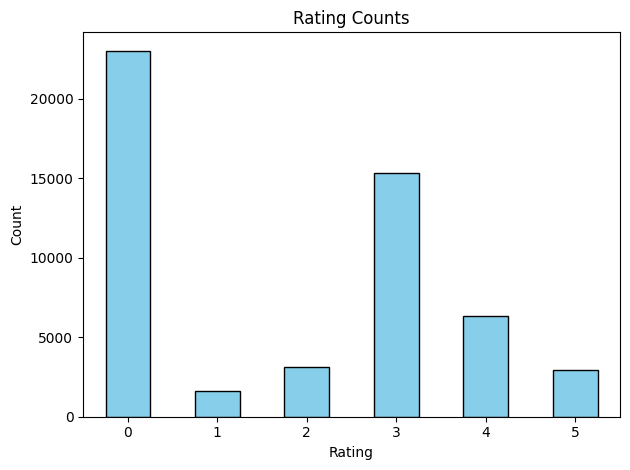

In [ ]:
import matplotlib.pyplot as plt

value_counts = ios_sleep['rate'].value_counts().sort_index()

# 바 차트 생성
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)  # x축 레이블 회전 각도 설정
plt.tight_layout()
plt.show()

In [ ]:
ios_sleep['rating']

27775     {'rating': '3', 'content': '', '__key__': {'na...
27777     {'rating': '2', 'content': '', '__key__': {'na...
27778     {'rating': '4', 'content': '', '__key__': {'na...
27779     {'rating': '3', 'content': '', '__key__': {'na...
27780     {'rating': '3', 'content': '', '__key__': {'na...
                                ...                        
169398    {'rating': '5', 'content': '', '__key__': {'na...
169399    {'rating': '5', 'content': '', '__key__': {'na...
169400    {'rating': '5', 'content': '', '__key__': {'na...
169401    {'rating': '5', 'content': '', '__key__': {'na...
169402    {'rating': '0', 'content': '', '__key__': {'na...
Name: rating, Length: 52327, dtype: object

In [ ]:
ios_sleep

,startedAt,endedAt,uid,seconds,standardSeconds,createdAt,selectedLabels,rating,comment,comment_yes
27775,2023-09-16 19:20:55.558541 UTC,2023-09-16 22:31:03.840713 UTC,kakao:2759743858,11408.0,11407.0,2023-09-16 19:20:55.55855 UTC,"stress,depression,anxiety,tired,study,phone","{'rating': '3', 'content': '', '__key__': {'na...",,1
27777,2023-09-27 18:23:17.149665 UTC,2023-09-27 23:07:26.840391 UTC,kakao:2759743858,17049.0,14865.0,2023-09-27 18:23:17.149681 UTC,"anxiety,tired,nervous,study,phone","{'rating': '2', 'content': '', '__key__': {'na...",,1
27778,2023-10-05 18:23:58.996649 UTC,2023-10-05 22:31:48.109114 UTC,kakao:2759743858,14870.0,14799.0,2023-10-05 18:23:58.996667 UTC,"stress,tired,sad,study","{'rating': '4', 'content': '', '__key__': {'na...",,1
27779,2023-10-02 18:52:02.506448 UTC,2023-10-02 23:02:04.601326 UTC,kakao:2759743858,15002.0,14968.0,2023-10-02 18:52:02.506459 UTC,"tired,nervous,study,phone","{'rating': '3', 'content': '', '__key__': {'na...",,1
27780,2023-09-30 18:31:39.51777 UTC,2023-09-30 23:00:54.627501 UTC,kakao:2759743858,16155.0,16144.0,2023-09-30 18:31:39.517786 UTC,"anxiety,nervous,study","{'rating': '3', 'content': '', '__key__': {'na...",,1
...,...,...,...,...,...,...,...,...,...,...
169398,2023-10-10 13:49:46.675858 UTC,2023-10-10 13:51:24.188046 UTC,qra4ZuDaPMgVlcadZiaKx0WVQX13,98.0,21480.0,2023-10-10 13:49:46.675869 UTC,,"{'rating': '5', 'content': '', '__key__': {'na...",,1
169399,2023-10-10 13:57:56.437227 UTC,2023-10-10 13:58:03.170488 UTC,qra4ZuDaPMgVlcadZiaKx0WVQX13,7.0,21480.0,2023-10-10 13:57:56.437242 UTC,tired,"{'rating': '5', 'content': '', '__key__': {'na...",,1
169400,2023-10-10 13:51:58.006804 UTC,2023-10-10 13:52:45.662197 UTC,qra4ZuDaPMgVlcadZiaKx0WVQX13,47.0,21840.0,2023-10-10 13:51:58.006813 UTC,tired,"{'rating': '5', 'content': '', '__key__': {'na...",,1
169401,2023-10-10 13:53:07.286028 UTC,2023-10-10 13:53:11.675529 UTC,qra4ZuDaPMgVlcadZiaKx0WVQX13,4.0,21480.0,2023-10-10 13:53:07.286036 UTC,,"{'rating': '5', 'content': '', '__key__': {'na...",,1


In [ ]:
ios_sleep['comment'].value_counts()

                            50969
피곤                             38
피곤함                            20
졸림                             15
굿                              14
                            ...  
중간에 세네번정도 깬듯. 짜증나는 꿈을 꿨다        1
완전 개운함!!!!!                     1
The                             1
잠 드는데에 오래걸림                     1
여전히 너무 피곤                       1
Name: comment, Length: 1155, dtype: int64

In [ ]:
ios_sleep['new_content'] = ios_sleep['rating'].apply(lambda x: x['content'] if x['content'] != '' else None)
ios_sleep['new_rating'] = ios_sleep['rating'].apply(lambda x: x['rating'] if x['content'] != '' else None)

<ipython-input-33-191b371172a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_sleep['new_content'] = ios_sleep['rating'].apply(lambda x: x['content'] if x['content'] != '' else None)
<ipython-input-33-191b371172a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_sleep['new_rating'] = ios_sleep['rating'].apply(lambda x: x['rating'] if x['content'] != '' else None)


In [ ]:
ios_sleep[['new_content', 'new_rating']]

,new_content,new_rating
27775,None,None
27777,None,None
27778,None,None
27779,None,None
27780,None,None
...,...,...
169398,None,None
169399,None,None
169400,None,None
169401,None,None


In [ ]:
ios_sleep[['new_rating']].value_counts()

new_rating
3             520
2             358
4             297
1             117
5              64
0               2
dtype: int64

In [ ]:
filtered_df = ios_sleep[ios_sleep['new_content'].notna()]

In [ ]:
comment_list = filtered_df['new_content'].tolist()
print(comment_list)

['중간에 깸', '우왕', 'T', '피곤', '피곤', '다시 자고 싶었다', '너무너무 조릭♡ 피곤', '너무너무 졸림', '기분이 좋은', '피곤', '배아파서 고샹함', '페곤', '피곤하지만 개운', '힘들어', '적당히 피곤했던', '나', '눈이 저절로 떠짐', '너무 졸림', '\n\nㄹ', '엥 왜 눈이 떠짐..? 이게..?', 'ㅎ', '존나졸려시팧', 'ㅊ\n', '조금 더 자구싶당...', '더 자구싶당 ㅜㅜ오늘 중간에 한번 깼어요', '더 자고싶어요.. ㅠㅠ', '어제보다 조금 더 개운한 느낌이에요', '12:30 부터 잠을 잤습니다 ㅎㅎ \n아주 좋아요', '학교 가기 싫어 빨리 집와서 쉬고싶다', '졸려', '엄청 졸리진 않긴 한데 더 자고싶어', '졸려 잠이 안와서 2시 넘어서 잠', '졸려 학원가야해ㅠ', '개운함', '피곤했음', '못잠', 'ㅈㅈㄴㅂ', 'ㅡ', 'ㅛ', '굿', '눈이 약간 뻐근 건조', '엄마가 깨워서 그런지 오늘 효과가 미미', '그저 그럼', '엄마가지랄해서일찍일어남', '코피남', '졸랴요', '피곤해 ㅠㅠㅠㅜ', '개운한데 쩡ㅇㄹ려', '개욶~ 한데 피곤 ㅠㅠ', '한 번 깸, 원래보단 개운하고수면 시간 줄어듦', '잠이 들긴 했는지 꿈을 꾸었지만 3시긴 40분 만에 일어났다. 그 시간 조차도 푹 자지 못하고 의식이 깨어있는 듯한 느낌.', '잠이 안 옴', '이상한 꿈 꿨음', '남편놈이 에어컨 거지같이 틀음ㅋㅋㅋ 더웠음', '악몽', '피곤', '졸려요', '일어나자마자는 살짝 피곤한 기분', 'G', ' ', '알람이 울렸지만 끄고 바로 잤고 너무 오래 자기도 했고 티비 소리땜에 시끄러워서 오히려 수면의 질이 안좋았다', '일어났을 때 졸리지 않음', '몰름', '못잠', '잠에 늦게 듦\n일어날 때 피곤했음', '중간에 많이 깼고 (소음), 아침에 일어났을 때 개운하지 않았다', '중간에 많이 깼음ㅠ', '졸랴뒤짖', '잠이 안 온다', '자다 깬 기분', '안 개운해', '잔듯 안 잔듯',

In [ ]:
from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리

In [ ]:
!pip install konlpy
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

nouns =ios_sleep['new_content'].apply(kkma.nouns)
nouns

27775     []
27777     []
27778     []
27779     []
27780     []
          ..
169398    []
169399    []
169400    []
169401    []
169402    []
Name: new_content, Length: 52327, dtype: object

In [ ]:
nouns = nouns.dropna().explode()
nouns

29405     중간
30849      우
31986     피곤
32002     피곤
32023      조
          ..
169350    생각
169350    신경
169350     잠
169350    와요
169390    피곤
Name: new_content, Length: 3171, dtype: object

In [ ]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
29405,중간,2
31986,피곤,2
32002,피곤,2
32023,조릭,2
32023,피곤,2
...,...,...
169350,소리,2
169350,생각,2
169350,신경,2
169350,와요,2


In [ ]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
633,피곤,189
580,중간,88
379,시간,75
424,알람,50
501,일어,37
...,...,...
267,먼지,1
268,메가,1
270,명상모드,1
271,몇번깻지,1


In [ ]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

In [ ]:
font = '/content/NanumSquareB.otf'

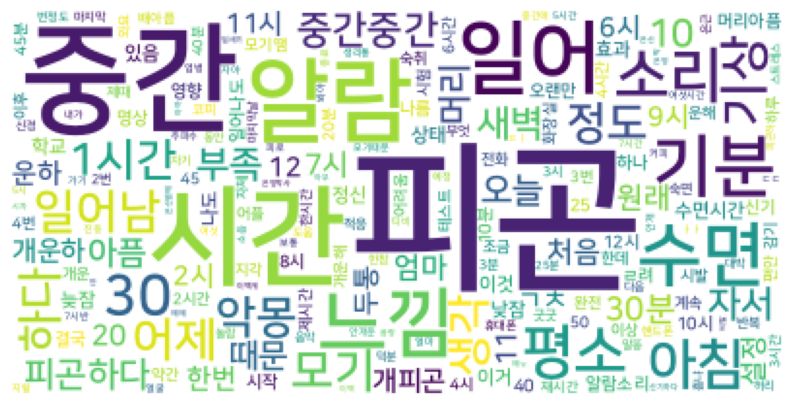

In [ ]:
wordcloud = WordCloud(font_path = font, background_color = 'white').generate_from_frequencies(dic_word)


plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(wordcloud) # 결과 보여주기
plt.savefig('review_wc') # 파일 저장


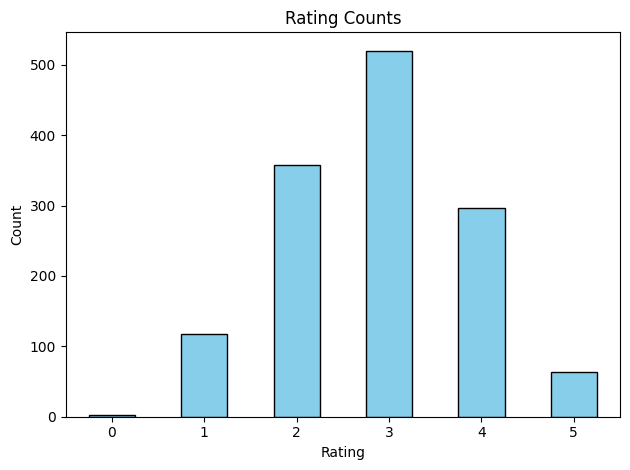

In [ ]:
import matplotlib.pyplot as plt

value_counts = ios_sleep['new_rating'].value_counts().sort_index()

# 바 차트 생성
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)  # x축 레이블 회전 각도 설정
plt.tight_layout()
plt.show()

In [ ]:
comment_pivot = ios_sleeptime_091824.pivot_table(index='uid', columns='adjusted_weekday', values='comment', aggfunc='last')[weekday_kor2].reset_index()

In [ ]:
comment_pivot.columns = ['uid', 'mon_comment', 'tue_comment', 'wed_comment', 'thu_comment', 'fri_comment', 'sat_comment', 'sun_comment']

In [ ]:
ios_sleephour_excel = pd.merge(ios_sleephour_excel, comment_pivot, on='uid', how='left')

In [ ]:
# 다시 시작

In [ ]:
ios_sleephour_excel['usernameid'] = ios_sleephour_excel['uid']

In [ ]:
ios_sleephour_excel

,uid,usernameid,username,average_sleep_hours,average_bedtime,average_waketime,sleep_pattern,mon_sleep_hours,tue_sleep_hours,wed_sleep_hours,...,tue_waketime,wed_waketime,thu_waketime,fri_waketime,sat_waketime,sun_waketime,daily_factor,phone_number,emotion,activity
0,ZydSCsTLYbTdXdhO9YSGpDlkjsu2,ZydSCsTLYbTdXdhO9YSGpDlkjsu2,안전한버니,6.4,00:41:28,05:36:48,66.0,5.4,7.5,6.0,...,05:50:51,07:59:12,00:57:36,07:39:37,None,None,"[tired, alcohol, tired, workout, shower, tired...",1.077047e+09,tired,latefood
1,MxkD4EoHO5ddegxO6fXzw762NNj2,MxkD4EoHO5ddegxO6fXzw762NNj2,Dlwowls,4.0,01:57:19,05:58:10,72.0,2.2,4.4,3.6,...,06:11:56,06:30:26,06:00:27,06:31:07,07:00:17,07:50:21,"[tired, easy, shower, phone, tired, phone, per...",1.024367e+09,tired,phone
2,blbgfHSOCjazvjuXtgzMpoZZQRo1,blbgfHSOCjazvjuXtgzMpoZZQRo1,이주호,5.4,01:01:15,06:25:08,60.0,4.5,5.4,5.4,...,06:00:16,06:00:19,06:01:02,None,07:47:51,06:40:32,"[, , , , , ]",1.053839e+09,nan,nan
3,Zz7vQArNMJX3ZEaqoObMEnee3nH3,Zz7vQArNMJX3ZEaqoObMEnee3nH3,쌀새,4.4,03:44:19,08:08:39,84.0,4.6,4.8,4.1,...,08:22:34,08:00:23,08:00:50,08:01:40,None,None,"[stress, depression, anxiety, nicotine, shower...",1.068664e+09,stress,nicotine
4,9yF83V71rvXXQk7eMqkZfNi9QMk2,9yF83V71rvXXQk7eMqkZfNi9QMk2,두부,5.0,01:21:13,06:20:14,58.0,4.3,5.8,5.0,...,06:10:15,06:13:56,05:57:20,06:17:57,None,07:01:45,"[tired, phone, tv, phone, tired, nicotine, wor...",1.044183e+09,tired,phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,kakao:3117327368,kakao:3117327368,이슬,6.3,02:55:35,07:45:50,40.0,NaN,NaN,7.6,...,None,None,08:03:39,06:41:07,10:50:00,11:41:00,"[stress, depression, shower, phone, cold, tire...",1.076876e+09,cold,phone
401,kakao:3117383714,kakao:3117383714,홍원여친,5.0,04:12:15,07:43:51,46.0,NaN,NaN,5.9,...,None,None,07:29:10,07:10:22,09:10:22,None,"[anxiety, tired, latefood, shower, phone, cold...",1.036570e+09,tired,latefood
402,kakao:3117392814,kakao:3117392814,민채기,3.2,01:36:53,04:30:47,52.0,NaN,NaN,2.4,...,None,None,02:05:35,00:45:07,09:55:47,08:01:53,"[stress, depression, tired, phone, stress, tir...",1.031486e+09,stress,phone
403,kakao:3134341838,kakao:3134341838,우아한버니,7.8,23:19:12,10:34:32,40.0,NaN,NaN,NaN,...,None,None,None,06:55:31,15:32:31,09:51:53,"[tired, phone, tired, phone, stress, anxiety, ...",1.023094e+09,tired,phone


In [ ]:
ios_sleephour_excel = ios_sleephour_excel[['uid', 'usernameid', 'username', 'average_sleep_hours',
       'average_bedtime', 'average_waketime', 'sleep_pattern',
       'mon_sleep_hours', 'tue_sleep_hours', 'wed_sleep_hours',
       'thu_sleep_hours', 'fri_sleep_hours', 'sat_sleep_hours',
       'sun_sleep_hours', 'mon_waketime', 'tue_waketime', 'wed_waketime',
       'thu_waketime', 'fri_waketime', 'sat_waketime', 'sun_waketime',
       'daily_factor', 'phone_number', 'emotion', 'activity' ]]

In [ ]:
ios_prev = pd.read_csv("/content/ios_report1623.csv", index_col = False)

In [ ]:
ios_prev.columns

Index(['uid', 'usernameid', 'username', 'average_sleep_hours',
       'average_bedtime', 'average_waketime', 'sleep_pattern',
       'mon_sleep_hours', 'tue_sleep_hours', 'wed_sleep_hours',
       'thu_sleep_hours', 'fri_sleep_hours', 'sat_sleep_hours',
       'sun_sleep_hours', 'mon_waketime', 'tue_waketime', 'wed_waketime',
       'thu_waketime', 'fri_waketime', 'sat_waketime', 'sun_waketime',
       'daily_factor', 'phone_number'],
      dtype='object')

In [ ]:
ios_prev = ios_prev[['uid','average_sleep_hours',
       'average_bedtime', 'average_waketime' ]]

In [ ]:
ios_prev.columns = ['uid','prev_average_sleep_hours',
       'prev_bedtime', 'prev_waketime' ]

In [ ]:
ios_sleephour_excel = pd.merge(ios_sleephour_excel, ios_prev, on = 'uid', how = 'left')

In [ ]:
ios_sleephour_excel

,uid,usernameid,username,average_sleep_hours,average_bedtime,average_waketime,sleep_pattern,mon_sleep_hours,tue_sleep_hours,wed_sleep_hours,...,fri_waketime,sat_waketime,sun_waketime,daily_factor,phone_number,emotion,activity,prev_average_sleep_hours,prev_bedtime,prev_waketime
0,ODoRb8nIFsaIgDaQIuaf7pcKqFz2,ODoRb8nIFsaIgDaQIuaf7pcKqFz2,김정현,5.8,00:33:28,06:20:20,46.0,4.6,6.2,7.9,...,06:50:20,None,None,"[tired, sad, phone, tired, phone, stress, tire...",1.031441e+09,tired,phone,6.5,00:17:33,06:50:27
1,w2vGFbQ9FUZEiLZC0xU6kM1srOv2,w2vGFbQ9FUZEiLZC0xU6kM1srOv2,알로에,6.8,00:12:39,07:03:21,76.0,6.0,6.6,NaN,...,07:18:06,None,None,"[tired, easy, phone, tv, tired, easy, stretchi...",1.036870e+09,tired,phone,6.5,00:21:13,06:50:07
2,i8GgNQpnghdGilN9xSXt3lPxwuQ2,i8GgNQpnghdGilN9xSXt3lPxwuQ2,기상하자,4.2,02:28:05,04:59:52,40.0,3.8,5.8,3.5,...,08:00:00,None,None,"[easy, awaken, reading, tv, headache, period, ...",1.048105e+09,easy,phone,4.4,02:55:39,06:06:56
3,MxkD4EoHO5ddegxO6fXzw762NNj2,MxkD4EoHO5ddegxO6fXzw762NNj2,Dlwowls,5.3,01:21:05,06:38:42,72.0,4.2,NaN,4.4,...,06:00:20,07:41:07,07:33:55,"[tired, easy, phone, headache, stress, anxiety...",1.024367e+09,tired,phone,5.9,01:32:57,07:25:42
4,blbgfHSOCjazvjuXtgzMpoZZQRo1,blbgfHSOCjazvjuXtgzMpoZZQRo1,이주호,11.4,23:42:06,05:05:42,40.0,NaN,26.5,5.3,...,None,None,07:40:38,"[, , , ]",1.053839e+09,nan,nan,5.6,00:48:31,05:27:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,kakao:3102158247,kakao:3102158247,성은,4.9,02:22:47,07:15:33,40.0,NaN,6.0,2.4,...,04:26:54,12:09:42,08:02:01,"[stress, anxiety, tired, study, phone, tv, hea...",1.084502e+09,tired,study,NaN,NaN,NaN
372,RcM7NX1iPpWkJY20twCkj00cVZk1,RcM7NX1iPpWkJY20twCkj00cVZk1,GentleBunny,2.3,03:47:41,06:05:46,40.0,NaN,6.1,3.1,...,02:22:59,01:42:00,07:20:37,"[stress, anxiety, tired, nicotine, workout, st...",1.056113e+09,tired,phone,NaN,NaN,NaN
373,kakao:3102302718,kakao:3102302718,딥슬립,5.9,01:16:42,07:09:14,68.0,NaN,NaN,5.8,...,06:40:46,08:30:45,None,"[easy, awaken, workout, phone, tired, easy, ph...",1.071781e+09,easy,phone,NaN,NaN,NaN
374,kakao:3103056348,kakao:3103056348,정,6.0,00:00:26,12:01:02,40.0,NaN,0.0,6.0,...,11:30:16,None,11:55:31,"[stress, tired, phone, tv, tired, phone, tv, t...",1.027212e+09,tired,phone,NaN,NaN,NaN


In [ ]:
ios_sleephour_excel.to_csv("ios_report2329.csv", index = False, encoding = 'utf-8-sig')

In [ ]:
sleep_pivot = sleep_pivot.reset_index()
sleep_pivot[sleep_pivot['uid'] == 'GMs7AoN4vserHA77Ld2QnPe9Hb92']

start_weekday,index,uid,mon,tue,wed,thu,fri,sat,sun,next_mon
212,212,GMs7AoN4vserHA77Ld2QnPe9Hb92,22:02:27,None,01:01:56,None,00:09:02,01:26:19,None,00:13:12
